# Clasificación de futbolistas mediante deep learning

En la continuidad de mi trabajo sobre la caracterización de los jugadores de fútbol, he utilizado métodos de aprendizaje profundo. Para separar a mis jugadores en diferentes clases, he utilizado mi clasificazion hecha con el trabajo de clustering (1 cluster = 1 clase). Entonces, mis datos (ver archivo "k_means_clusters.csv") se componen de 52 features (goals, bigChancesCreated, asssists ...) y de 9 clases (cada una representando un tipo de jugador).

In [12]:
import pandas as pd
import sklearn
from sklearn.preprocessing import label_binarize
from tensorflow import keras
from keras import models
from scipy import interp
from keras import layers
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv('k_means_clusters.csv', index_col='name')

# Selecciono todos los datos en X
X = data.iloc[:, :-1]
print(X.head())

# Selecciono todos los targets en y
y = data.iloc[:, -1]
print(y.head())

                 goals  bigChancesCreated  bigChancesMissed   assists  \
name                                                                    
Yaya Touré   -0.423817          -0.052154         -0.283263  1.055707   
Arturo Vidal  0.088257          -0.143615         -0.126104 -0.093351   
Axel Witsel  -0.129084          -1.015703         -0.343300 -0.439132   
Rafinha      -0.829356          -0.108621         -0.722721 -0.165008   
Philipp Lahm -0.829356          -1.015703         -0.182957 -0.613521   

              goalsAssistsSum  accuratePasses  inaccuratePasses  totalPasses  \
name                                                                           
Yaya Touré           0.140034        1.265302         -0.462732     1.185215   
Arturo Vidal         0.025418        1.596239          0.212326     1.584193   
Axel Witsel         -0.285561        1.143602         -0.985962     1.007755   
Rafinha             -0.688548        1.414349          0.168641     1.401497   
Philipp 

Separo mis datos en un conjunto de entrenamiento y un conjunto de prueba. 

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

y_train = keras.utils.to_categorical(y_train, 9)
y_test = keras.utils.to_categorical(y_test, 9)

# Creación del modelo

Creo mi red neuronal, elijo una dimensión de 52 como entrada porque tengo 52 columnas en mi tabla de datos, y una dimensión de 9 como salida porque tengo 9 clases. A continuación, elijo la función de acitivación 'sigmoid' porque es eficiente para problemas de clasificación, una función de pérdida 'categorical_crossentropy' para problemas multiclase y una métrica 'accuracy'.

In [14]:
model = models.Sequential()
model.add(keras.Input(shape=(52)))
model.add(layers.Dense(52, activation='sigmoid'))
model.add(layers.Dense(9, activation='sigmoid'))
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='adam')

# Entrenamiento y matriz de confusion

Luego entreno mi modelo y lo pruebo. A continuación, trazo la matriz de confusión y el coeficiente de clasificación. Vemos que obtenemos excelentes resultados, con una precisión superior al 90%.

In [16]:
model.fit(X_train, y_train, epochs=60, batch_size=4, verbose=1, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_1D = np.argmax(y_pred, axis=1)
y_test_1D = np.argmax(y_test, axis=1)
result = model.evaluate(X_test, y_test, verbose=1)
accuracy = result[1]
print(f"La precisión del modelo para el conjunto de prueba es del {round(accuracy * 100, 2)} %")
result = model.evaluate(X_train, y_train, verbose=1)
accuracy = result[1]
print(f"La precisión del modelo para el conjunto de entrenamieto es del {round(accuracy * 100, 2)} %")




print('\nConfusion matrix\n')
print(confusion_matrix(y_test_1D, y_pred_1D))
print('\nClassification report\n')
print(classification_report(y_test_1D, y_pred_1D, target_names=['class 0', 'class 1',
                                                   'class 2', 'class 3',
                                                   'class 4', 'class 5',
                                                   'class 6', 'class 7',
                                                   'class 8']))

Epoch 1/60
40/40 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.9937 - val_loss: 0.3979 - val_accuracy: 0.8889
Epoch 2/60
40/40 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9937 - val_loss: 0.3973 - val_accuracy: 0.8889
Epoch 3/60
40/40 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9937 - val_loss: 0.4034 - val_accuracy: 0.8889
Epoch 4/60
40/40 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9937 - val_loss: 0.4102 - val_accuracy: 0.8889
Epoch 5/60
40/40 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9937 - val_loss: 0.3902 - val_accuracy: 0.8889
Epoch 6/60
40/40 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9937 - val_loss: 0.3855 - val_accuracy: 0.8889
Epoch 7/60
40/40 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9937 - val_loss: 0.3885 - val_accuracy: 0.8889
Epoch 8/60
40/40 [==

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Curva ROC

Trazo la curva ROC para cada clase y, de nuevo, los resultados son excelentes.

<ipython-input-17-a80ffdb4cac9>:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


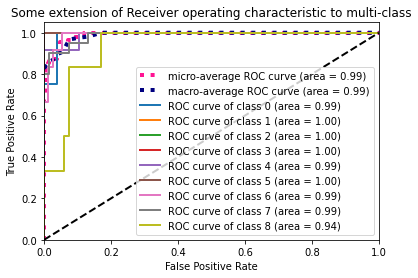

In [17]:
n_classes = 9
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

for i, in zip(range(n_classes)):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Influencia de los parámetros

Elevado número de épocas ==> aumenta la precisión del modelo y reduce las pérdidas.

Con o sin validación ==> no cambia nada.

Batch size ==> es mejor utilizar un número pequeño cuando el conjunto de datos es pequeño.

Función de activación ==> 'sigmoid' tiene los mejores resultados pero 'softmax' también tiene muy buenos resultados. Por el contrario, "relu" por ejemplo no funciona bien o no he conseguido que funcione.

Learning rate ==> los mejores resultados se obtienen con la configuración por defecto de keras. Puedo obtener buenos resultados cambiando la taza de aprendizaje, pero nunca tan buenos.

Número de capas ==> Sorprendentemente, la precisión no aumenta multiplicando el número de capas. Por el contrario, disminuye y el modelo parece necesitar más épocas para aprender.

# Conclusión

Una vez encontrada una buena arquitectura de red neuronal, los resultados obtenidos para clasificar a los jugadores de fútbol son muy satisfactorios a pesar de la escasa cantidad de datos para entrenar cada clase (mejores resultados que para la regresión logística). Después de probar varios parámetros, tengo la impresión de que es difícil hacerlo mucho mejor que los parámetros por defecto de keras. Los dos parámetros que me parecen más importantes son la elección de la función de activación y de pérdida, que cambia en función de los problemas a resolver (clasificación binaria, multiclase, tipos de datos...).